In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import cv2

# Iteration Plots

In [21]:
def filterdata(gps, embedding, margin=1000):
    positive_gps = []
    positive_embedding = []
    for i in range(len(gps)):
        for j in range(len(gps[i])):
            if gps[i][j] < margin:
                positive_gps.append(gps[i][j])
                positive_embedding.append(abs(1-embedding[i][j]))
    positive_gps = np.array(positive_gps).reshape(-1, 1)
    reg = LinearRegression().fit(positive_gps, positive_embedding)
    return positive_gps, positive_embedding, reg

def plotdata(positive_gps, positive_embedding, reg):
    positive_embedding_pred = reg.predict(positive_gps)    
    plt.scatter(positive_gps, positive_embedding)
    plt.plot(positive_gps, positive_embedding_pred, color='red', linewidth=3)
    plt.show()

## Modified Contrastive Loss

In [13]:
gps = np.genfromtxt('data/RegressionContrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/RegressionContrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


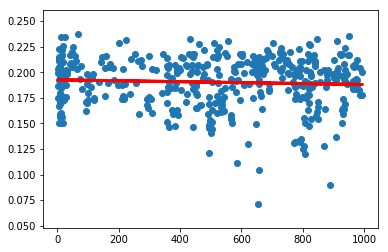

In [14]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [22]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (-4.580900043992026e-06, 0.19256776992977737)


## Modified Contrastive Loss (Trained on full dataset)

In [10]:
gps = np.genfromtxt('data/FullRegressionContrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/FullRegressionContrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


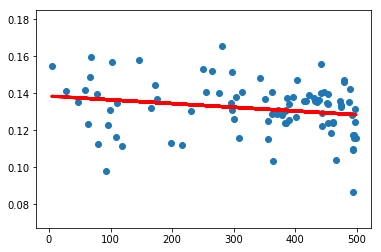

In [11]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [36]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (-9.282388756603972e-07, 0.13277191313796502)


## Contrastive

In [23]:
gps = np.genfromtxt('data/Contrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Contrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


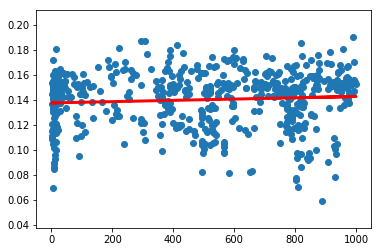

In [24]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [25]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (5.138916892325146e-06, 0.13776178706981995)


## Linear Overweighted Contrastive

In [26]:
gps = np.genfromtxt('data/Overweighted/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Overweighted/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


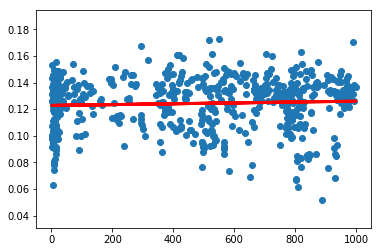

In [27]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

# Iteration Plots

## Positive Point Distribution for different query points

In [17]:
datasets = ['data/IT2/RegressionContrastive', 'data/IT2/Contrastive', 'data/IT2/ContinuedContrastive', 'data/IT2/OnlyPositiveContrastive', 'data/IT2/RegContrastiveContinued']

gps = np.genfromtxt(f'{datasets[3]}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[3]}/embedding.csv', delimiter=',')

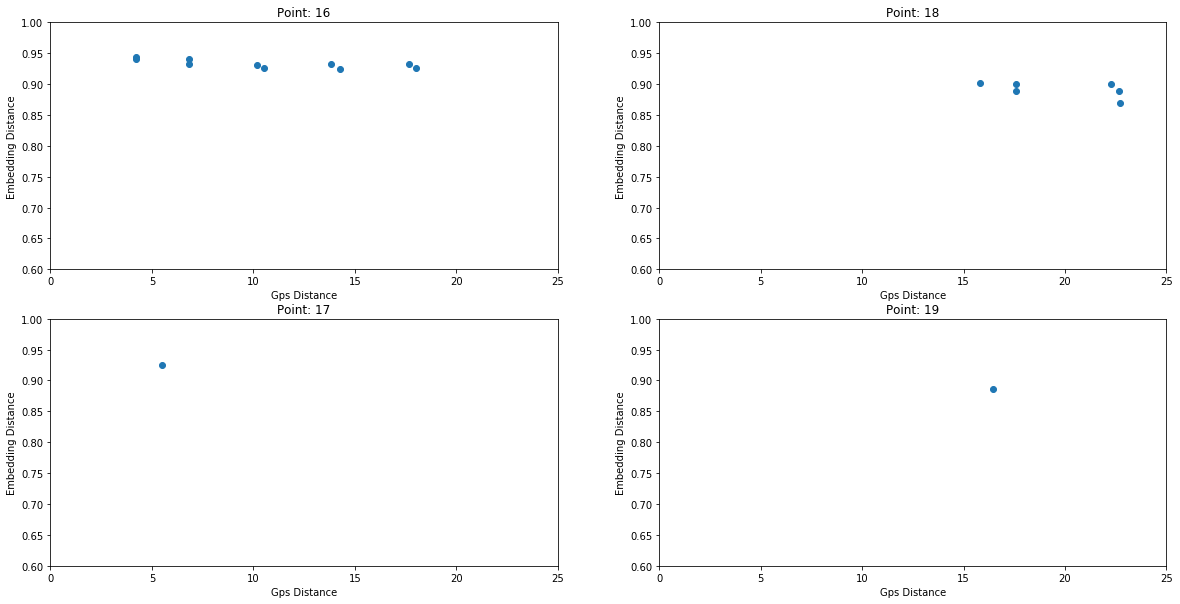

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = 16

for i in range(4):
    axs[i % 2, i // 2].scatter(gps[seed + i][gps[seed + i] != 0], emb[seed + i][emb[seed + i] != 0])
    axs[i % 2, i // 2].set_xlim([0, 25])
    axs[i % 2, i // 2].set_ylim([0.60, 1])
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')

Notes: 
- Points are very uniformly distributed 
- Points fall in range (0.8 - 0.9)
- No correlation 

Text(0.5, 1.0, 'Aggregation of distances')

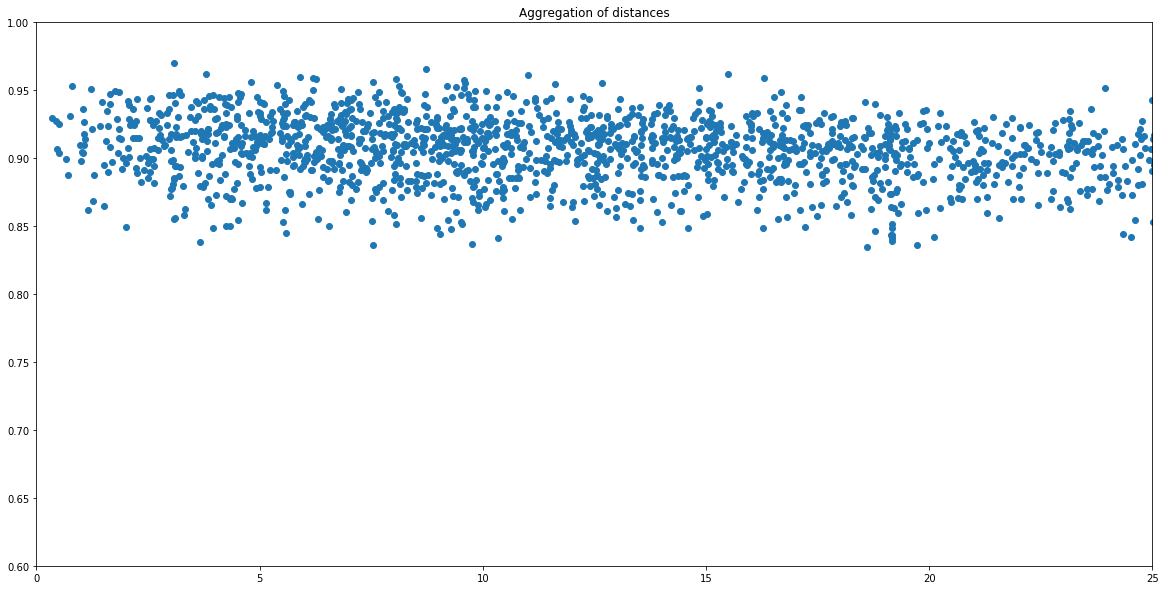

In [19]:
gps = gps.flatten()
emb = emb.flatten()

fig, axs = plt.subplots(1, 1, figsize=(20,10))
axs.scatter(gps[gps != 0], emb[emb != 0])
axs.set_xlim([0, 25])
axs.set_ylim([0.60, 1])
axs.set_title('Aggregation of distances')

## Distance at different Epochs

This section compares the distances to the same points, at different stages during training the network (100, 200 and top epoch). 

- Epoch 100: Recall (1,5,10): [0.41704442 0.54669084 0.5893019 ], mAP 5: 0.281610506698902
- Epoch 200: Recall (1,5,10): [0.43155032 0.57026292 0.62012693], mAP 5: 0.30139291830361636
- Epoch Top: Recall (1,5,10): [0.44696283 0.5793291  0.6337262 ], mAP 5: 0.3122917296262718 

In [309]:
gps100 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_100/gps.csv', delimiter=',')
gps200 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_200/gps.csv', delimiter=',')
gpsbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/gps.csv', delimiter=',')
emb100 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_100/embedding.csv', delimiter=',')
emb200 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_200/embedding.csv', delimiter=',')
embbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/embedding.csv', delimiter=',')

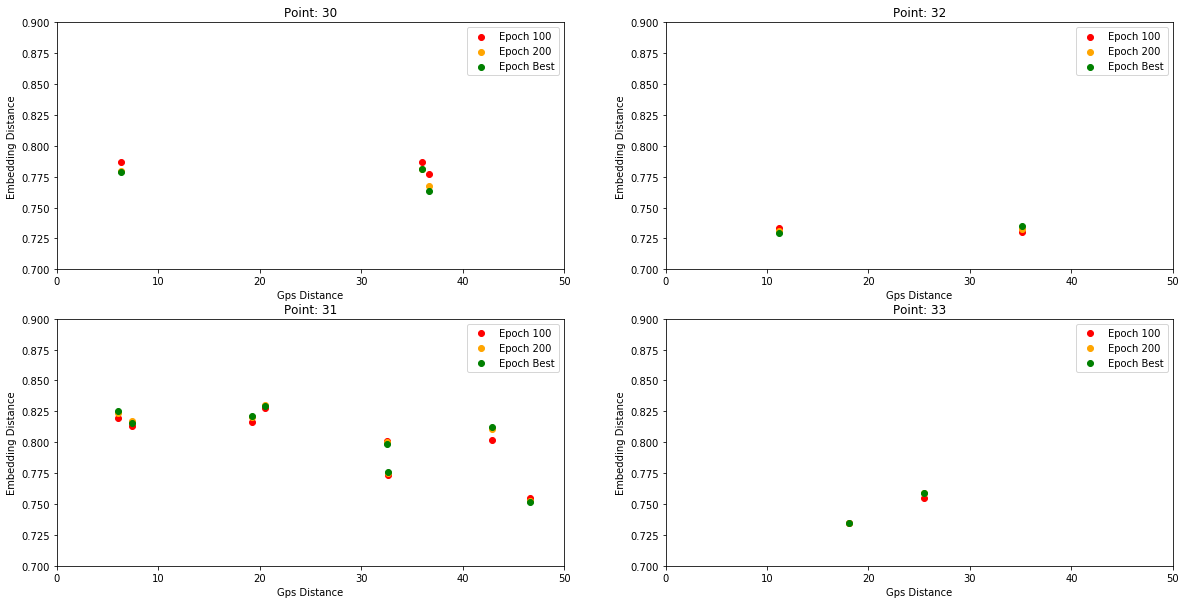

In [310]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = 30 #random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps100[seed + i][gps100[seed + i] != 0], emb100[seed + i][emb100[seed + i] != 0], color='red', label='Epoch 100')
    axs[i % 2, i // 2].scatter(gps200[seed + i][gps200[seed + i] != 0], emb200[seed + i][emb200[seed + i] != 0], color='orange', label='Epoch 200')
    axs[i % 2, i // 2].scatter(gpsbest[seed + i][gpsbest[seed + i] != 0], embbest[seed + i][embbest[seed + i] != 0], color='green', label='Epoch Best')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.70, 0.9])
    axs[i % 2, i // 2].legend()

Notes: 
- Generally, points tend to move away 
- Little to no difference between how positives and negatives are moved

[]

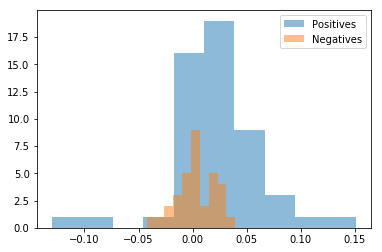

In [249]:
pos_emb_best = np.where(gpsbest <= 25, embbest, embbest*0)
pos_emb_100 = np.where(gps100 <= 25, emb100, emb100*0)

pos_dist = np.zeros(len(emb100))
for i in range(len(emb100)):
    pos_dist[i] = np.sum(pos_emb_best[i] - pos_emb_100[i])

    
neg_emb_best = np.where(gpsbest > 25, embbest, embbest*0)
neg_emb_100 = np.where(gps100 > 25, emb100, emb100*0)

neg_dist = np.zeros(len(emb100))
for i in range(len(emb100)):
    neg_dist[i] = np.sum(neg_emb_best[i] - neg_emb_100[i])
    
plt.hist(pos_dist[pos_dist != 0], alpha=0.5, label='Positives')
plt.hist(neg_dist[neg_dist != 0], alpha=0.5, label='Negatives')
plt.legend()
plt.plot()

In [251]:
pos_mean = pos_dist[pos_dist != 0].mean()
neg_mean = neg_dist[neg_dist != 0].mean()
print('Mean Delta (Positives): {}'.format(pos_mean))
print('Mean Delta (Negatives): {}'.format(neg_mean))

Mean Delta (Positives): 0.021529169036791876
Mean Delta (Negatives): 0.0033454515717246318


## Embedding Distance Histogram

In [8]:
gpsbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/gps.csv', delimiter=',')
embbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/embedding.csv', delimiter=',')

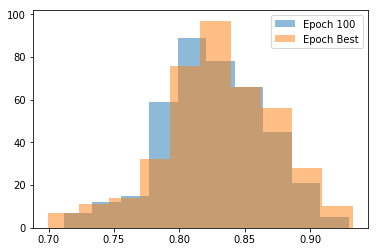

In [9]:
plt.hist(emb100[emb100 != 0], alpha=0.5, label='Epoch 100')
plt.hist(embbest[embbest != 0], alpha=0.5, label='Epoch Best')
plt.legend()

In [10]:
pos_emb = np.where(gpsbest <= 25, embbest, embbest*0)
neg_emb = np.where(gpsbest > 25, embbest, embbest*0)

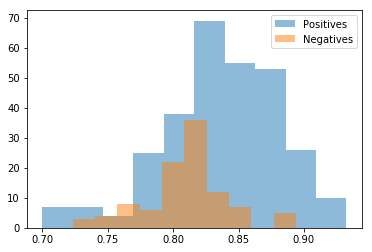

In [11]:
plt.hist(pos_emb[pos_emb != 0], alpha=0.5, label='Positives')
plt.hist(neg_emb[neg_emb != 0], alpha=0.5, label='Negatives')
plt.legend()

## 4

In [3]:
gps20 = np.genfromtxt('data/IT2/CDFTobit/epoch_20/gps.csv', delimiter=',')
gps180 = np.genfromtxt('data/IT2/CDFTobit/epoch_180/gps.csv', delimiter=',')
emb20 = np.genfromtxt('data/IT2/CDFTobit/epoch_20/embedding.csv', delimiter=',')
emb180 = np.genfromtxt('data/IT2/CDFTobit/epoch_180/embedding.csv', delimiter=',')

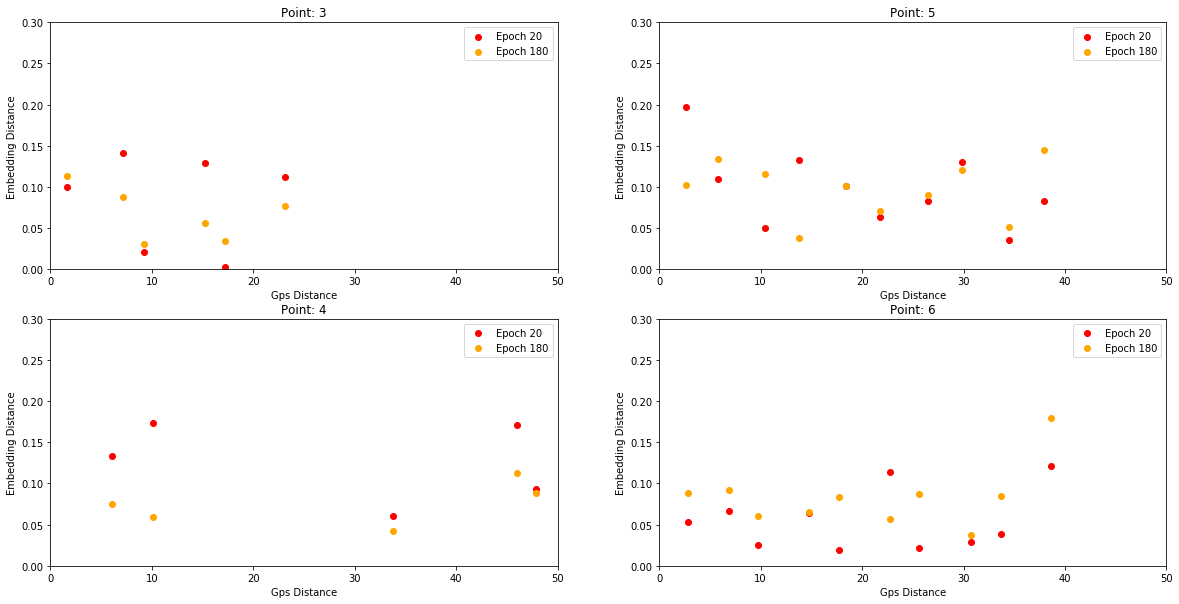

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps20[seed + i][gps20[seed + i] != 0], emb20[seed + i][emb20[seed + i] != 0], color='red', label='Epoch 20')
    axs[i % 2, i // 2].scatter(gps180[seed + i][gps180[seed + i] != 0], emb180[seed + i][emb180[seed + i] != 0], color='orange', label='Epoch 180')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.0, 0.3])
    axs[i % 2, i // 2].legend()

## Contrastive Continued with Modified Contrastive

In [315]:
datasets = ['data/IT2/RegressionContrastive', 'data/IT2/Contrastive', 'data/IT2/ContinuedContrastive']

gps = np.genfromtxt(f'{datasets[1]}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[1]}/embedding.csv', delimiter=',')

gps_c = np.genfromtxt(f'{datasets[2]}/gps.csv', delimiter=',')
emb_c = np.genfromtxt(f'{datasets[2]}/embedding.csv', delimiter=',')

In [327]:
np.mean(np.sum(emb - emb_c, axis=1))

-0.06195431910102676